Student name: Matthew Noonan

Student pace: self paced 

Scheduled project review date/time:

Instructor name: Abhineet Kulkarni

Blog post URL:

# Business Case

For this project, we are assuming the role of developers of a new app/service called appraiseMe. This is an appraisal app
in which users enter in information about their home and receive a reasonable (but rough) estimate on the value of their 
property. Central to this is a well-developed regression model that is trained on real-world sales data. The idea is that
if the model can accurately predict past sales prices, then it should be able to predict current and future sales prices too. Our presentation will take the form of a product pitch. In question is

1. How does the product work?
2. Is it accurate?
3. Does it add value to the user's experience?

We've touched briefly on number one. Basically, it uses the regression model we're developing here to predict sales price from user input data against a database of sales information of already completed sales.

As for it's accuracy, that's what we're developing here. While it's not amazingly accurate yet, with more data to feed into the model, it could become much more accurate.

Value added would be mainly from ease of use, convenience, and whatever user experience develops for it. It is easier to use than googling the information, and it's customizeable to the user's own property information. 

Ideally, the user would input only a few key datapoints, the app would plug those into its equation and return the estimated price. The biggest question then becomes which 

Our audience here is a group of potential investors who may be less interested in the code than they are potential return on investment.

# Data Understanding

Data is taken from a file of home sales in Washington state's Kings County from years 2014-2015. The features include:

* `id` - Unique identifier for a house

* `date` - Date house was sold

* `price` - Sale price (prediction target)

* `bedrooms` - Number of bedrooms

* `bathrooms` - Number of bathrooms

* `sqft_living` - Square footage of living space in the home

* `sqft_lot` - Square footage of the lot

* `floors` - Number of floors (levels) in house

* `waterfront` - Whether the house is on a waterfront. Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts

* `view` - Quality of view from house. Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other

* `condition` - How good the overall condition of the house is. Related to maintenance of house.
 
* `grade` - Overall grade of the house. Related to the construction and design of the house.
 
* `sqft_above` - Square footage of house apart from basement

* `sqft_basement` - Square footage of the basement

* `yr_built` - Year when house was built

* `yr_renovated` - Year when house was renovated

* `zipcode` - ZIP Code used by the United States Postal Service

* `lat` - Latitude coordinate

* `long` - Longitude coordinate

* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors

* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

We will be exploring all of them first and then whitling them down as relevance or predictive strength dictate. At this stage in the product development life cycle, we are unlikely to be too interested in geographic information, so lat, long, and probably zipcode will be stricken. Though on that last one, we might have to play with it a bit.


# Import relevant libraries

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
from sklearn import linear_model 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Import Data and Initial Exploration

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()
df.info()
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


The data consists of 21 features, of which four are categorical. At first glance there don't appear to be too many outliers, but there are NaN's present. The overall strategy for preprocessing will be as follows:

1. Find and scrub NaN's. 
2. Turn categorical columns into either binary or dummies.
3. Create new features as needed.
4. Check correlation with price to aid in baseline model creation.

After preprocessing, we will use statsmodels to optimize a regression model, then sklearn to train and test that regression model. We will attempt to answer, in particular, several questions using this model including which feature contributes or detracts the greatest from sale price, and what is the minimum number of features required to acheive a reasonably accurate result?

# Preprocessing

In [4]:
update_df = df.drop([df.index[15856]])
df = update_df

In [5]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.00,3,2.50,1530,1131,3.00,NO,NONE,...,8 Good,1530,0.0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2/23/2015,400000.00,4,2.50,2310,5813,2.00,NO,NONE,...,8 Good,2310,0.0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,6/23/2014,402101.00,2,0.75,1020,1350,2.00,NO,NONE,...,7 Average,1020,0.0,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,1/16/2015,400000.00,3,2.50,1600,2388,2.00,NaN,NONE,...,8 Good,1600,0.0,2004,0.00,98027,47.53,-122.07,1410,1287


In [6]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
df['waterfront'].fillna('NO',inplace=True)
df['waterfront'].value_counts()

NO     21450
YES      146
Name: waterfront, dtype: int64

We will fill the waterfront NaNs with 'NO', since it's assumed, given the selling point, the presence of a waterfront would not be missed or ignored. The get_dummies function will convert it to numerical values anyway.

In [8]:
df['view'].value_counts(dropna=False)
df['view'].fillna('NONE',inplace=True)


NONE         19421
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
NaN             63
Name: view, dtype: int64

We will do the same for view.

In [9]:
df['yr_renovated'].value_counts(dropna=False)
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)

0.00       17010
NaN         3842
2014.00       73
2003.00       31
2013.00       31
           ...  
1971.00        1
1953.00        1
1944.00        1
1976.00        1
1946.00        1
Name: yr_renovated, Length: 71, dtype: int64

In [10]:
def recent_renovation(year):
    if year >= 1990:
        return 1
    else:
        return 0
    
df['recent_reno'] = df['yr_renovated'].apply(recent_renovation)

In [11]:
df['recent_reno'].value_counts()
df.drop('yr_renovated', axis=1, inplace=True)

0    21074
1      522
Name: recent_reno, dtype: int64

In [12]:
df 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,recent_reno
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NO,NONE,...,7 Average,1180,0.0,1955,98178,47.51,-122.26,1340,5650,0
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,98125,47.72,-122.32,1690,7639,1
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,...,6 Low Average,770,0.0,1933,98028,47.74,-122.23,2720,8062,0
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,98136,47.52,-122.39,1360,5000,0
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,98074,47.62,-122.05,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.00,3,2.50,1530,1131,3.00,NO,NONE,...,8 Good,1530,0.0,2009,98103,47.70,-122.35,1530,1509,0
21593,6600060120,2/23/2015,400000.00,4,2.50,2310,5813,2.00,NO,NONE,...,8 Good,2310,0.0,2014,98146,47.51,-122.36,1830,7200,0
21594,1523300141,6/23/2014,402101.00,2,0.75,1020,1350,2.00,NO,NONE,...,7 Average,1020,0.0,2009,98144,47.59,-122.30,1020,2007,0
21595,291310100,1/16/2015,400000.00,3,2.50,1600,2388,2.00,NO,NONE,...,8 Good,1600,0.0,2004,98027,47.53,-122.07,1410,1287,0


Here we've made 'yr_renovated' into a binary feature that indicates whether or not the property has been renovated in the last 30 or so years.

We will also create a new feature from the 'yr_built' column, called 'age', which is exactly as it sounds.

In [13]:
df['age'] = 2022 - df['yr_built']
df = df.drop('yr_built', axis=1)

In [14]:
df = df.drop(columns=['id','date','sqft_basement'],axis=1)


In [15]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,recent_reno,age
count,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00,21596.00
mean,540291.96,3.37,2.12,2080.34,15099.83,1.49,1788.63,98077.95,47.56,-122.21,1986.65,12758.66,0.02,51.00
std,367376.02,0.90,0.77,918.12,41413.55,0.54,827.76,53.51,0.14,0.14,685.23,27275.02,0.15,29.38
min,78000.00,1.00,0.50,370.00,520.00,1.00,370.00,98001.00,47.16,-122.52,399.00,651.00,0.00,7.00
25%,322000.00,3.00,1.75,1430.00,5040.00,1.00,1190.00,98033.00,47.47,-122.33,1490.00,5100.00,0.00,25.00
50%,450000.00,3.00,2.25,1910.00,7619.00,1.50,1560.00,98065.00,47.57,-122.23,1840.00,7620.00,0.00,47.00
75%,645000.00,4.00,2.50,2550.00,10685.50,2.00,2210.00,98118.00,47.68,-122.12,2360.00,10083.00,0.00,71.00
max,7700000.00,11.00,8.00,13540.00,1651359.00,3.50,9410.00,98199.00,47.78,-121.31,6210.00,871200.00,1.00,122.00


<Figure size 1008x792 with 0 Axes>

<Figure size 1008x792 with 0 Axes>

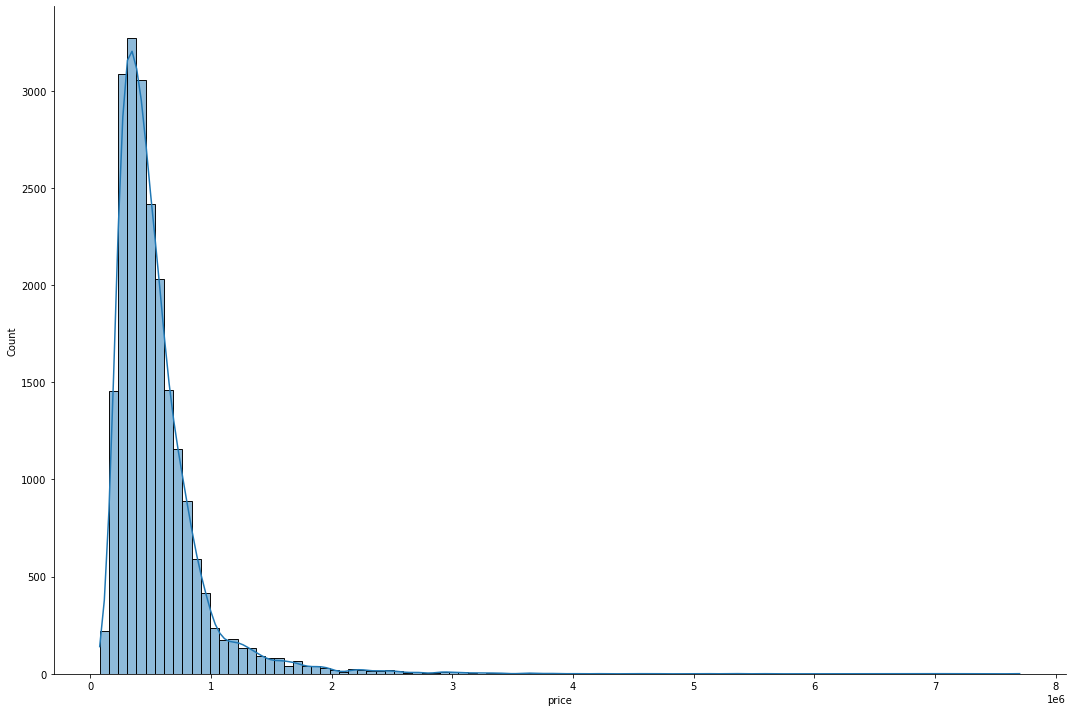

In [16]:
plt.figure(figsize=(14, 11))
sns.displot(x='price', data=df, bins=100, kde=True, height=10, aspect=1.5)

The distribution of prices is very heavily skewed. We will probably need to remove outliers.

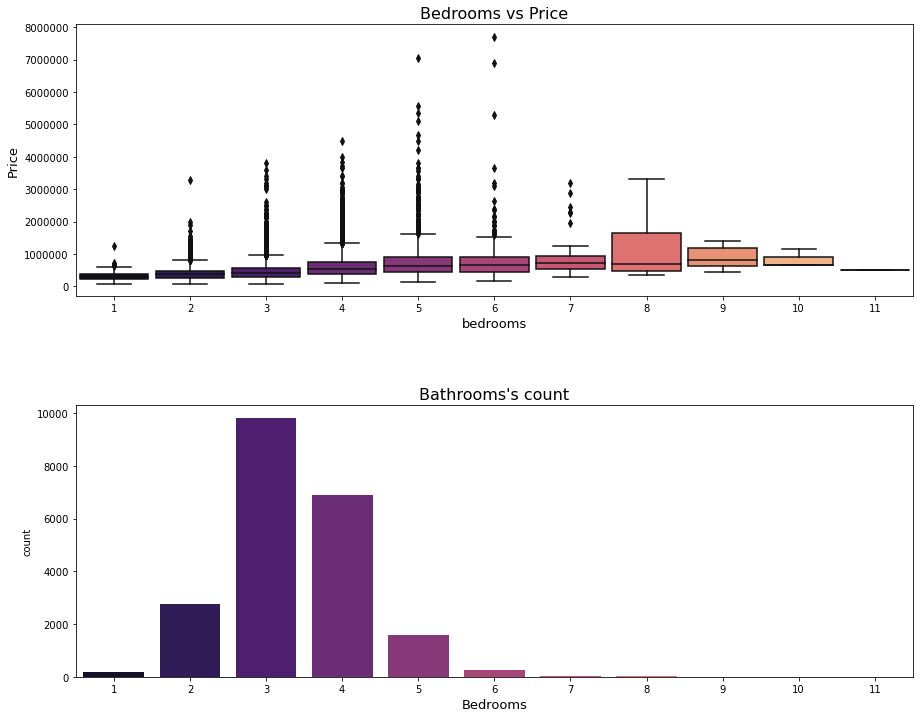

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (15, 12))

sns.boxplot(ax=axes[0], x='bedrooms', y='price', data=df, width=0.9, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('bedrooms', fontsize=13)
axes[0].set_ylabel('Price', fontsize=13)
axes[0].set_title('Bedrooms vs Price', fontsize=16)

sns.countplot(ax=axes[1], x='bedrooms', data=df, palette='magma')
axes[1].set_xlabel('Bedrooms', fontsize=13)
axes[1].set_title("Bathrooms's count", fontsize=16)
plt.subplots_adjust(wspace=0.4, hspace=0.4);

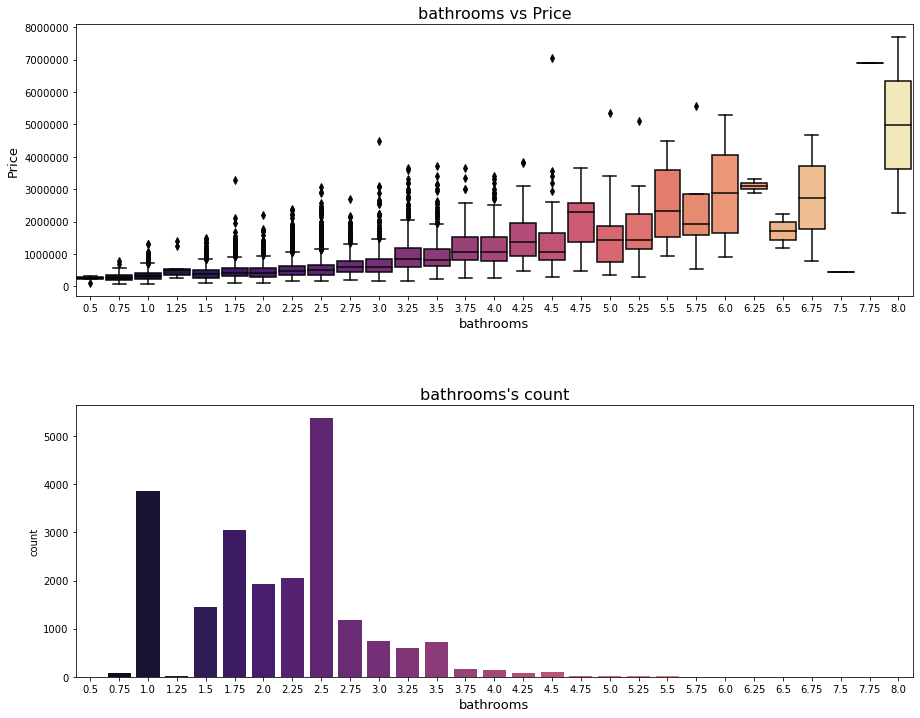

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (15, 12))

sns.boxplot(ax=axes[0], x='bathrooms', y='price', data=df, width=0.9, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('bathrooms', fontsize=13)
axes[0].set_ylabel('Price', fontsize=13)
axes[0].set_title('bathrooms vs Price', fontsize=16)

sns.countplot(ax=axes[1], x='bathrooms', data=df, palette='magma')
axes[1].set_xlabel('bathrooms', fontsize=13)
axes[1].set_title("bathrooms's count", fontsize=16)
plt.subplots_adjust(wspace=0.4, hspace=0.4);

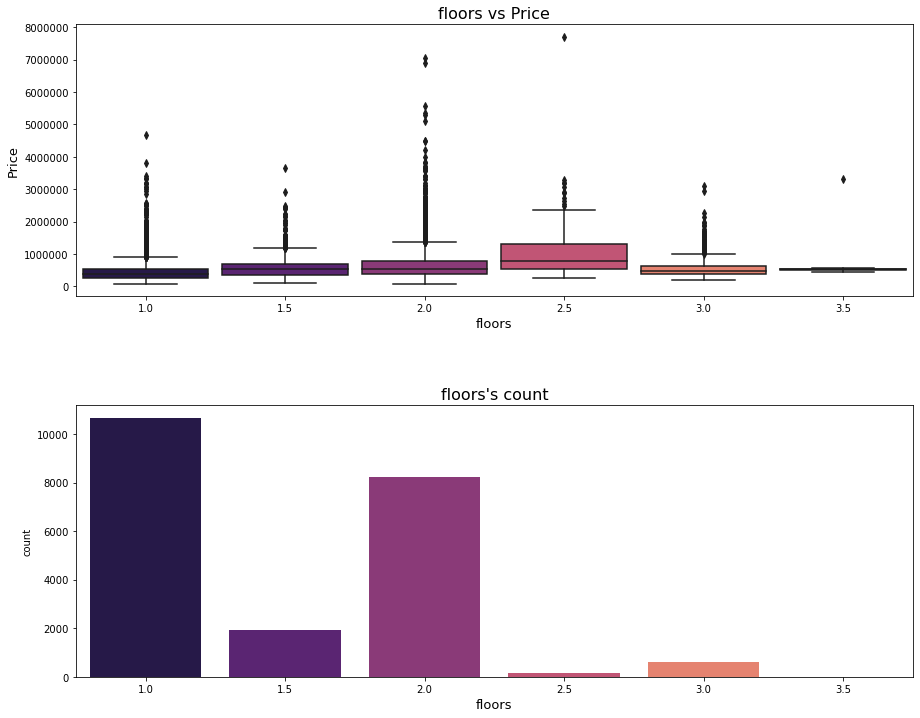

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (15, 12))

sns.boxplot(ax=axes[0], x='floors', y='price', data=df, width=0.9, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('floors', fontsize=13)
axes[0].set_ylabel('Price', fontsize=13)
axes[0].set_title('floors vs Price', fontsize=16)

sns.countplot(ax=axes[1], x='floors', data=df, palette='magma')
axes[1].set_xlabel('floors', fontsize=13)
axes[1].set_title("floors's count", fontsize=16)
plt.subplots_adjust(wspace=0.4, hspace=0.4);

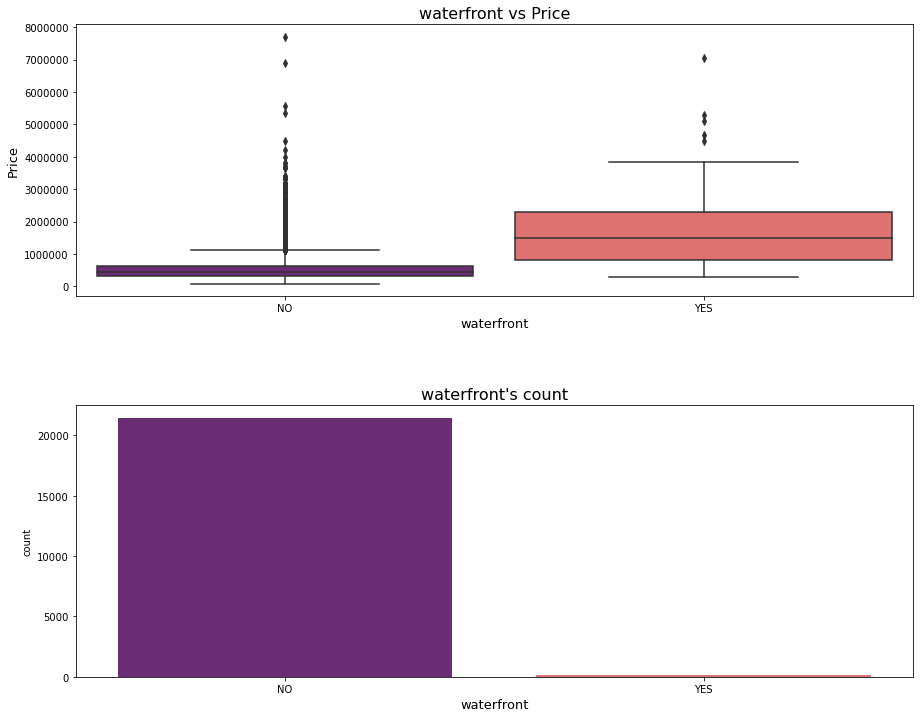

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (15, 12))

sns.boxplot(ax=axes[0], x='waterfront', y='price', data=df, width=0.9, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('waterfront', fontsize=13)
axes[0].set_ylabel('Price', fontsize=13)
axes[0].set_title('waterfront vs Price', fontsize=16)

sns.countplot(ax=axes[1], x='waterfront', data=df, palette='magma')
axes[1].set_xlabel('waterfront', fontsize=13)
axes[1].set_title("waterfront's count", fontsize=16)
plt.subplots_adjust(wspace=0.4, hspace=0.4);

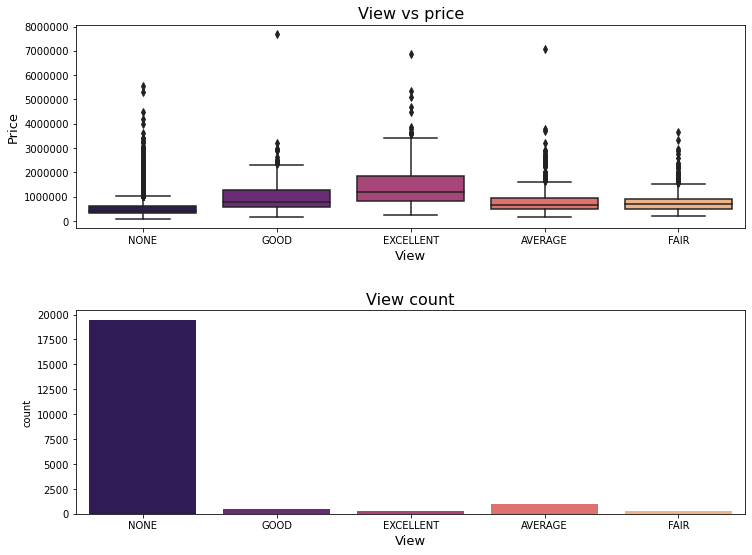

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 9))

sns.boxplot(ax=axes[0], x='view', y='price', data=df, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('View', fontsize=13)
axes[0].set_ylabel('Price', fontsize=13)
axes[0].set_title('View vs price', fontsize=16)

sns.countplot(ax=axes[1], x='view', data=df, palette='magma')
axes[1].set_xlabel('View', fontsize=13)
axes[1].set_title("View count", fontsize=16)
plt.subplots_adjust(wspace=0.4, hspace=0.4);

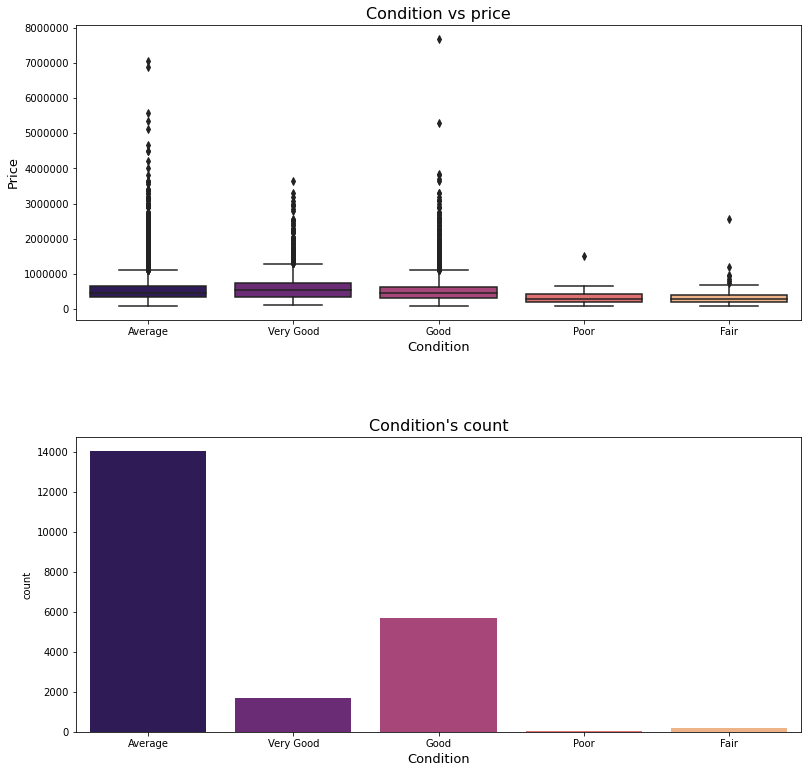

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(13, 13))

sns.boxplot(ax=axes[0], x='condition', y='price', data=df, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('Condition', fontsize=13)
axes[0].set_ylabel('Price', fontsize=13)
axes[0].set_title('Condition vs price', fontsize=16)

sns.countplot(ax=axes[1], x='condition', data=df, palette='magma')
axes[1].set_xlabel('Condition', fontsize=13)
axes[1].set_title("Condition's count", fontsize=16)
plt.subplots_adjust(wspace=0.4, hspace=0.4);

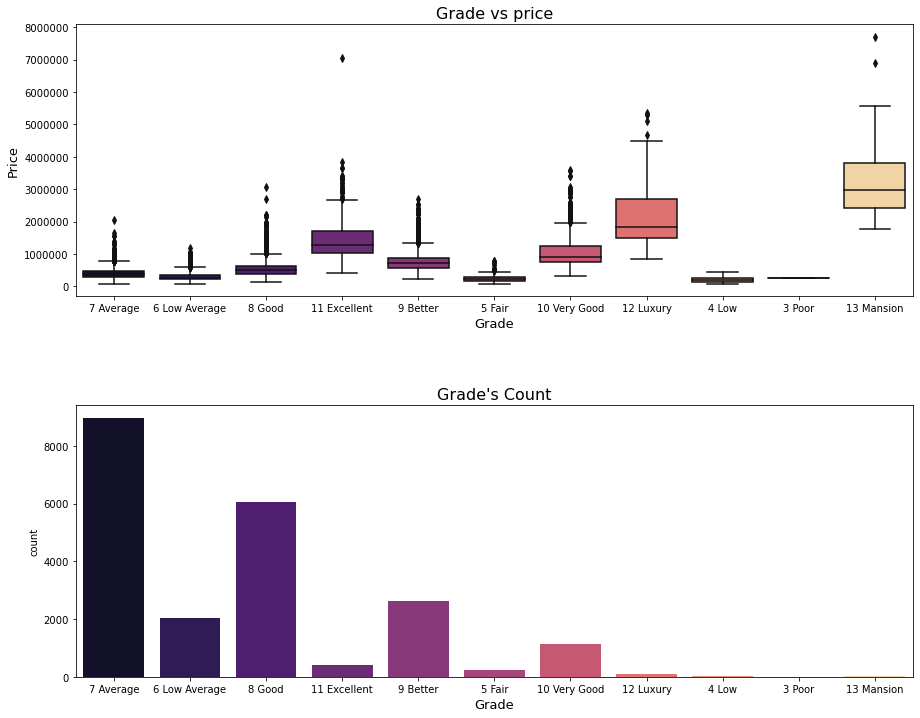

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

sns.boxplot(ax=axes[0], x='grade', y='price', data=df, palette='magma')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].set_xlabel('Grade', fontsize=13)
axes[0].set_ylabel('Price', fontsize=13)
axes[0].set_title('Grade vs price', fontsize=16)

sns.countplot(ax=axes[1], x='grade', data=df, palette='magma')
axes[1].set_xlabel('Grade', fontsize=13)
axes[1].set_title("Grade's Count", fontsize=16)
plt.subplots_adjust(wspace=0.4, hspace=0.4);

Skewed is a good keyword for all of the features. We will wait a bit to investigate whether or not a transform will help at all.

Our next step, however, is to create dummy variable columns of the categorical variables. We will use the get_dummies method and then concat the dummy columns and our original dataframe into our new dataframe df1.

In [24]:
categorical = ['waterfront', 'view', 'condition', 'grade']

dummies = pd.get_dummies(df[categorical], drop_first=True)

df1 = df.drop(df[categorical], axis=1)

df1 = pd.concat([df1, dummies], axis=1)

df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,zipcode,lat,long,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.00,3,1.00,1180,5650,1.00,1180,98178,47.51,-122.26,...,0,0,0,0,0,0,0,1,0,0
1,538000.00,3,2.25,2570,7242,2.00,2170,98125,47.72,-122.32,...,0,0,0,0,0,0,0,1,0,0
2,180000.00,2,1.00,770,10000,1.00,770,98028,47.74,-122.23,...,0,0,0,0,0,0,1,0,0,0
3,604000.00,4,3.00,1960,5000,1.00,1050,98136,47.52,-122.39,...,0,0,0,0,0,0,0,1,0,0
4,510000.00,3,2.00,1680,8080,1.00,1680,98074,47.62,-122.05,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00,3,2.50,1530,1131,3.00,1530,98103,47.70,-122.35,...,0,0,0,0,0,0,0,0,1,0
21593,400000.00,4,2.50,2310,5813,2.00,2310,98146,47.51,-122.36,...,0,0,0,0,0,0,0,0,1,0
21594,402101.00,2,0.75,1020,1350,2.00,1020,98144,47.59,-122.30,...,0,0,0,0,0,0,0,1,0,0
21595,400000.00,3,2.50,1600,2388,2.00,1600,98027,47.53,-122.07,...,0,0,0,0,0,0,0,0,1,0


# Modeling the data 

With preprocessing out of the way, we can finally move on to regression. Our response variable will be price, and to establish a baseline, we will use just the feature most highly correlated with price. Here we're taking the absolute value of the correlation only for sorting purposes. Even if a feature were to have say, a negative 0.46 correlation, the magnitude of the relationship is what's important. Sort by descending would put those at the bottom.

Looking below, it seems that that feature is sqft_living.

In [25]:
corr_matrix = df1.corr()
abs(corr_matrix['price']).sort_values(ascending=False)

price                 1.00
sqft_living           0.70
sqft_above            0.61
sqft_living15         0.59
bathrooms             0.53
grade_11 Excellent    0.36
view_NONE             0.36
grade_7 Average       0.32
bedrooms              0.32
lat                   0.31
view_EXCELLENT        0.30
grade_12 Luxury       0.29
waterfront_YES        0.26
floors                0.26
grade_9 Better        0.24
grade_13 Mansion      0.21
grade_6 Low Average   0.21
view_GOOD             0.18
recent_reno           0.12
view_FAIR             0.09
sqft_lot              0.09
grade_5 Fair          0.08
sqft_lot15            0.08
condition_Very Good   0.06
age                   0.05
zipcode               0.05
condition_Fair        0.05
grade_4 Low           0.03
condition_Good        0.03
long                  0.02
condition_Poor        0.02
grade_3 Poor          0.01
grade_8 Good          0.00
Name: price, dtype: float64

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,zipcode,lat,long,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
price,1.00,0.32,0.53,0.70,0.09,0.26,0.61,-0.05,0.31,0.02,...,0.36,0.29,0.21,-0.01,-0.03,-0.08,-0.21,-0.32,0.00,0.24
bedrooms,0.32,1.00,0.53,0.59,0.03,0.18,0.49,-0.16,-0.01,0.14,...,0.12,0.06,0.04,-0.02,-0.07,-0.12,-0.24,-0.11,0.08,0.16
bathrooms,0.53,0.53,1.00,0.76,0.09,0.50,0.69,-0.20,0.02,0.22,...,0.25,0.16,0.10,-0.01,-0.06,-0.14,-0.37,-0.31,0.19,0.26
sqft_living,0.70,0.59,0.76,1.00,0.17,0.35,0.88,-0.20,0.05,0.24,...,0.35,0.24,0.14,-0.01,-0.05,-0.13,-0.31,-0.36,0.07,0.32
sqft_lot,0.09,0.03,0.09,0.17,1.00,-0.00,0.18,-0.13,-0.09,0.23,...,0.08,0.06,0.01,-0.00,0.00,0.02,-0.02,-0.07,-0.02,0.05
floors,0.26,0.18,0.50,0.35,-0.00,1.00,0.52,-0.06,0.05,0.13,...,0.12,0.05,0.02,-0.01,-0.03,-0.08,-0.23,-0.31,0.20,0.24
sqft_above,0.61,0.49,0.69,0.88,0.18,0.52,1.00,-0.26,-0.00,0.34,...,0.34,0.22,0.13,-0.01,-0.05,-0.11,-0.28,-0.39,0.06,0.34
zipcode,-0.05,-0.16,-0.20,-0.20,-0.13,-0.06,-0.26,1.00,0.27,-0.56,...,-0.06,-0.04,0.00,-0.01,-0.01,0.01,0.15,0.07,-0.05,-0.09
lat,0.31,-0.01,0.02,0.05,-0.09,0.05,-0.00,0.27,1.00,-0.14,...,0.04,0.02,0.01,-0.02,-0.02,-0.05,-0.06,-0.04,0.03,0.04
long,0.02,0.14,0.22,0.24,0.23,0.13,0.34,-0.56,-0.14,1.00,...,0.06,0.03,-0.01,0.01,0.01,0.01,-0.11,-0.11,0.03,0.13


<AxesSubplot:>

<function matplotlib.pyplot.show(close=None, block=None)>

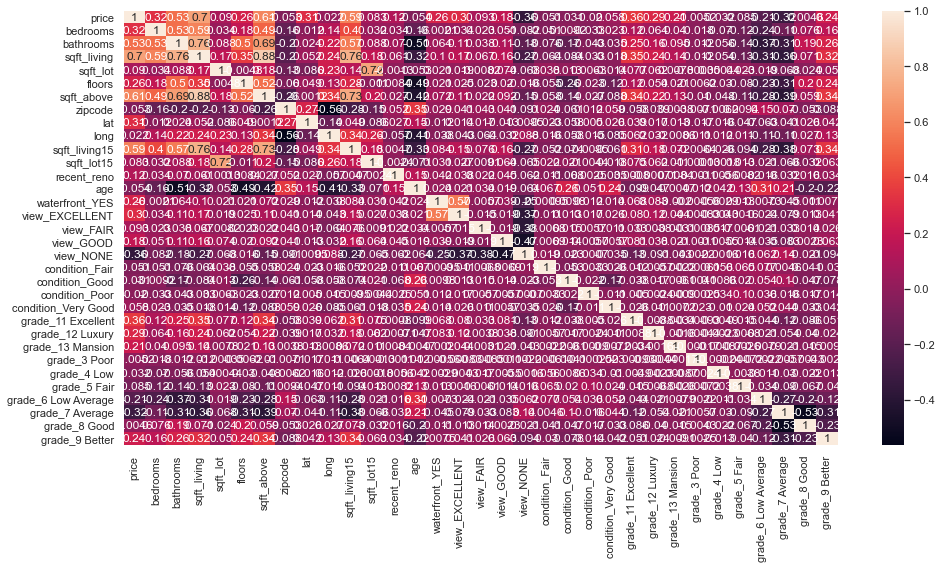

In [26]:
df1.corr()
sns.set(rc={'figure.figsize':(16,8)})
sns.heatmap(df1.corr(), annot=True)
plt.show

In [27]:
df1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'recent_reno', 'age', 'waterfront_YES', 'view_EXCELLENT', 'view_FAIR',
       'view_GOOD', 'view_NONE', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very Good', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low',
       'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better'],
      dtype='object')

Here we establish our baseline by creating a simple linear regression model between our predictor, sqft_living, and our response variable, price. 

First we define X and y.
We then split the data into training and test datasets, with 80% assigned to train, and 20% to test.
The LinearRegression model is then fit to the training dataset.
After training, we are able to use our model 'baseline' to make predictions.
We create a dataframe containing our actual and predicted prices, as well as the residuals.

Here we've chosen to display our data as integers for readability.

We've also displayed our scores as integers for the same reason except for r2, which has instead been
rounded to three places.

# Baseline Model

In [106]:
# Define X and y variables
X = df1[['sqft_living']]
y = df1['price']

In [107]:
from sklearn import metrics
from sklearn.metrics import r2_score

# Split the data, assigning 20% of it to the test group
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Instantiate the model and fit on the training data
baseline = LinearRegression()
baseline.fit(X_train, y_train)

# Having fit the model, create a dataframe of model coefficients vs feature(s)
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': baseline.coef_})
coef_df

# Make predictions and store as dataframe with residual. Change datatype to int for readability
y_predict = baseline.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict, 'Residual': (y_test - y_predict)})
df_predict.astype(int)


# Scoring the model
print('The intercept is:', int(baseline.intercept_))
print('R-squared Score:', round(r2_score(y_test, y_predict), 3))
print('Mean Absolute Error:', int(metrics.mean_absolute_error(y_test, y_predict)))
print('Mean Squared Error:', int(metrics.mean_squared_error(y_test, y_predict)))
print('Root Mean Squared Error:', int(np.sqrt(metrics.mean_squared_error(y_test, y_predict))))

LinearRegression()

,Feature,Coefficient
0,sqft_living,281.65


,Actual,Predicted,Residual
3686,132500,194111,-61611
10247,415000,379997,35002
4037,494000,458859,35140
3437,355000,275788,79211
19291,606000,377181,228818
...,...,...,...
2522,175000,241991,-66991
11119,394950,532087,-137137
11973,437000,551802,-114802
17601,293000,515188,-222188


The intercept is: -45288
R-squared Score: 0.494
Mean Absolute Error: 171321
Mean Squared Error: 66347737547
Root Mean Squared Error: 257580


After each model run, we display a number of graphics that test whether we're adhering to the assumptions of 
linear regression.

The first is a residual vs fit scatterplot, which can show us whether or not the assumption of equal variances holds.
The second checks linearity of residuals.
The third is a standard qq plot to determine if the data is normally distributed.

## Baseline Model Predictions and Assumptions Tests

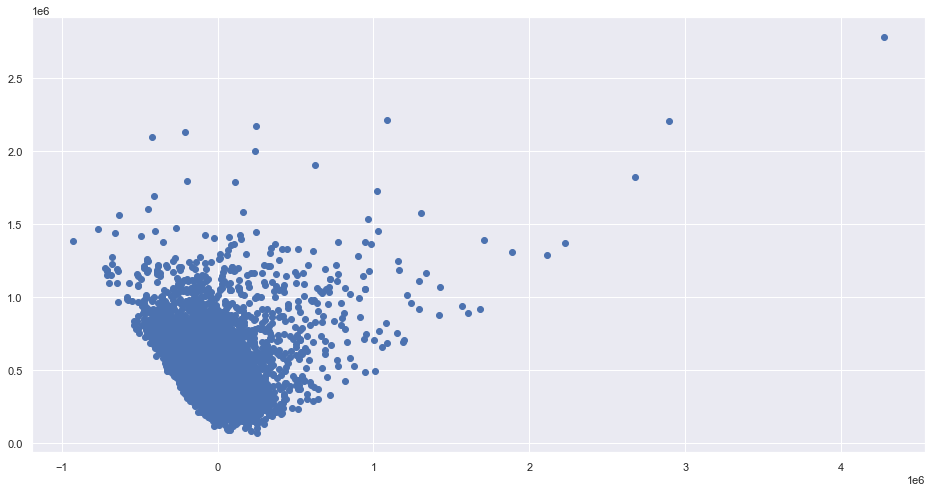

,Actual,Predicted,Residual,StdResidual
3686,132500.00,194111.07,-61611.07,-0.23
10247,415000.00,379997.96,35002.04,0.14
4037,494000.00,458859.06,35140.94,0.14
3437,355000.00,275788.64,79211.36,0.31
19291,606000.00,377181.49,228818.51,0.89
...,...,...,...,...
2522,175000.00,241991.03,-66991.03,-0.25
11119,394950.00,532087.23,-137137.23,-0.53
11973,437000.00,551802.51,-114802.51,-0.44
17601,293000.00,515188.43,-222188.43,-0.86


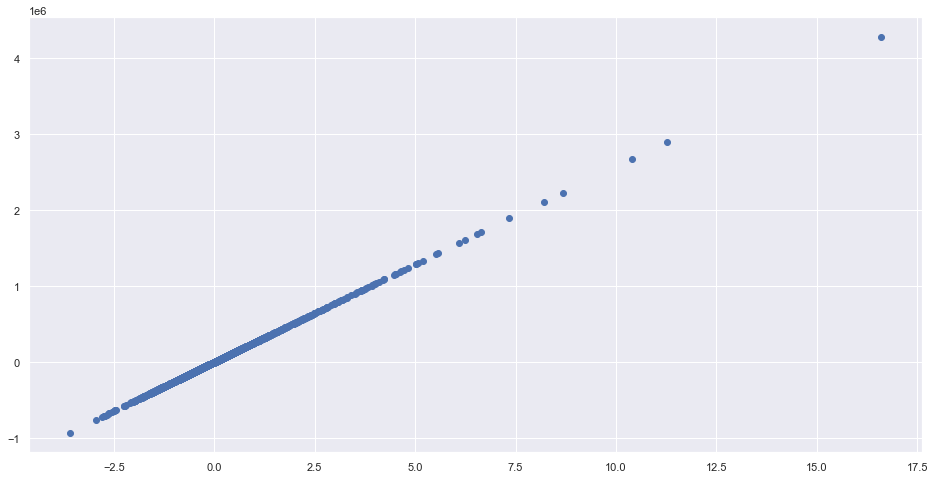

((array([-3.99684924, -3.78161652, -3.66388182, ...,  3.66388182,
          3.78161652,  3.99684924]),
  array([  78000.,   80000.,   81000., ..., 6890000., 7060000., 7700000.])),
 (309913.75382095797, 540291.9567512503, 0.8434565852738316))

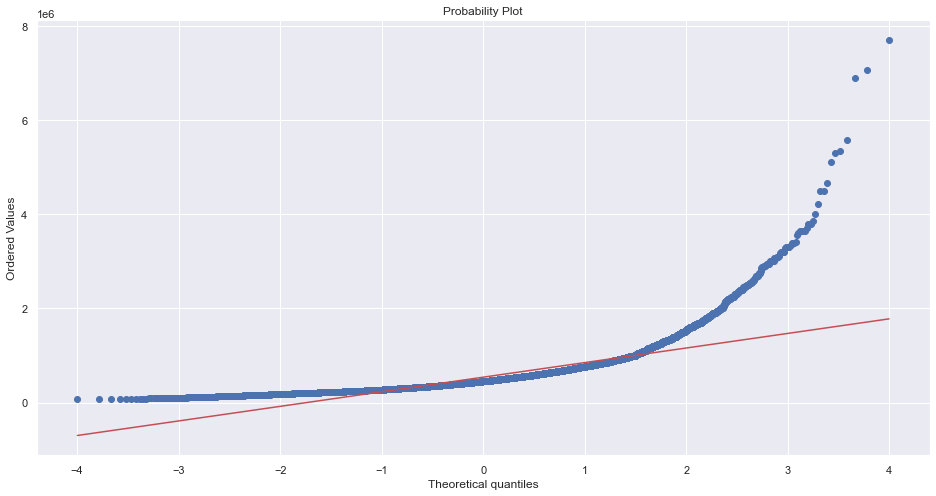

In [108]:
residuals = y_test - y_predict
plt.scatter(residuals,y_predict)
plt.show()

mean = df_predict["Residual"].mean()
std = df_predict["Residual"].std()

df_predict["StdResidual"] = (df_predict["Residual"] - mean)/std
df_predict

plt.scatter(df_predict["StdResidual"],df_predict["Residual"])
plt.show()

import pylab 

stats.probplot(y, dist="norm", plot=pylab)
pylab.show()

## Baseline Model Cross-Validation

In [109]:
cross_validation_5 = KFold(5, shuffle=True)
cross_validation_10 = KFold(5, shuffle=True)
cross_validation_20 = KFold(5, shuffle=True)

cv_5_results  = np.mean(cross_val_score(baseline, X, y, cv=cross_validation_5,  scoring='r2'))
cv_10_results = np.mean(cross_val_score(baseline, X, y, cv=cross_validation_10, scoring='r2'))
cv_20_results = np.mean(cross_val_score(baseline, X, y, cv=cross_validation_20, scoring='r2'))

cv_5_results
cv_10_results
cv_20_results

0.49179602854826837

0.49212222196190697

0.4915740331775895

With only sqft_living, our model acheives an R-Squared value of about 50%...not too shabby. Next we will use the previous correlation value list to select the most promising features in terms of predictive value by dropping from df1 features with the weakest price correlation values.

# Model 1

In [147]:
X = df1.drop(['price', 
              'view_FAIR',              
              'sqft_lot',               
              'grade_5 Fair',           
              'sqft_lot15',             
              'condition_Very Good',    
              'age',              
              'zipcode',      
              'condition_Fair',         
              'grade_4 Low',            
              'condition_Good',         
              'long',
              'condition_Poor', 
              'grade_3 Poor', 
              'grade_8 Good'], axis=1)
y = df1['price']

In [148]:
# split the data into test/train groups with 20% of the data allocated to testing. The process used for the baseline will be the same 
# for each iteration of regression.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model_1.coef_})
coef_df

y_predict = model_1.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict, 'Residual': (y_test - y_predict)})
df_predict.astype(int)

print('The intercept is:', model_1.intercept_)
print('R-squared Score:', r2_score(y_test, y_predict))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

LinearRegression()

,Feature,Coefficient
0,bedrooms,-20669.09
1,bathrooms,8295.61
2,sqft_living,183.80
3,floors,-135.40
4,sqft_above,-7.69
5,lat,688073.82
6,sqft_living15,42.96
7,recent_reno,160031.05
8,waterfront_YES,548033.48
9,view_EXCELLENT,194450.54


,Actual,Predicted,Residual
3686,132500,176448,-43948
10247,415000,459397,-44397
4037,494000,367609,126390
3437,355000,436471,-81471
19291,606000,438534,167465
...,...,...,...
2522,175000,103254,71745
11119,394950,478916,-83966
11973,437000,382767,54232
17601,293000,282307,10692


The intercept is: -32490786.410200212
R-squared Score: 0.6728504027293597
Mean Absolute Error: 129920.15358570003
Mean Squared Error: 42860854192.46762
Root Mean Squared Error: 207028.63133505863


## Model 1 Predictions and Assumptions Tests

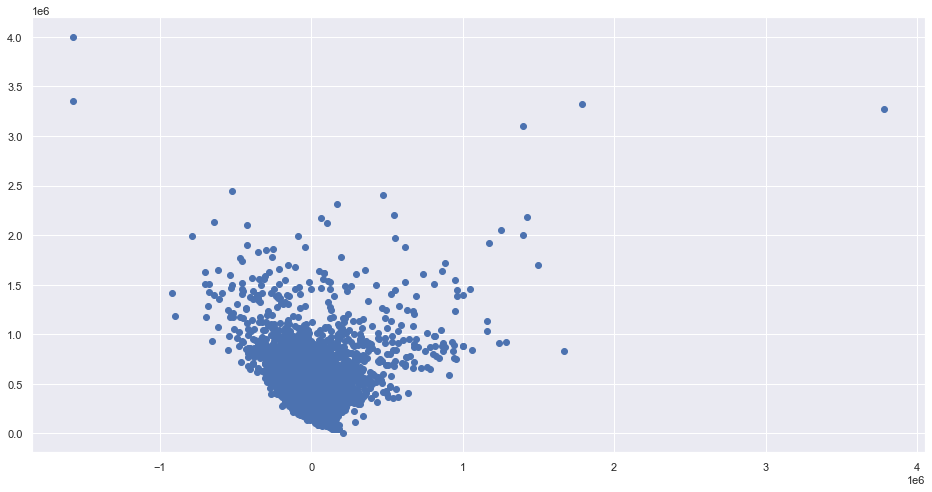

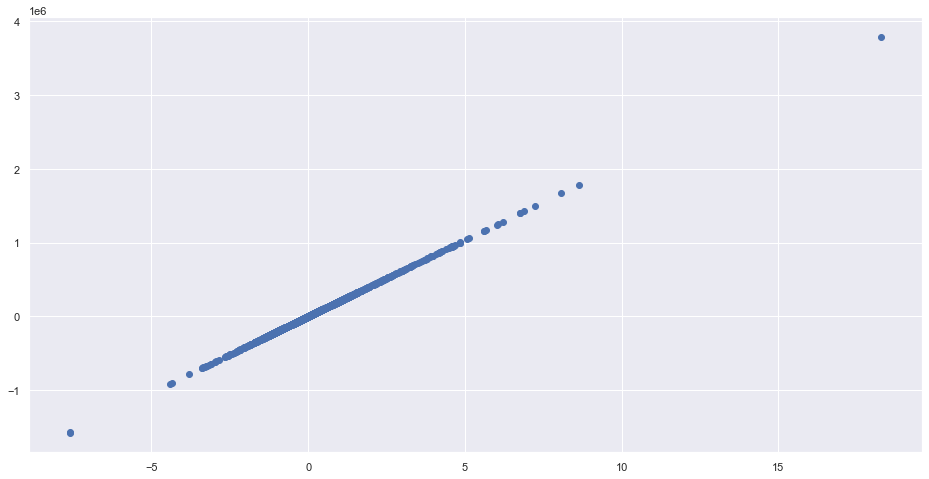

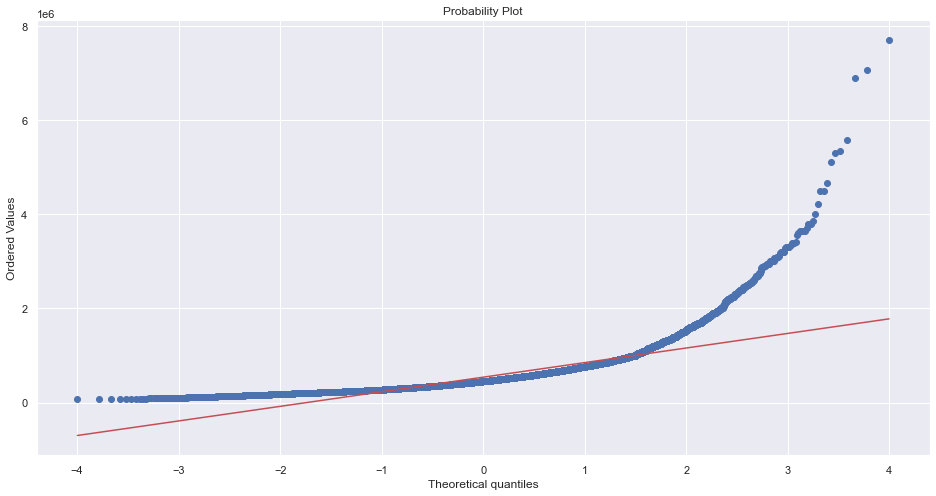

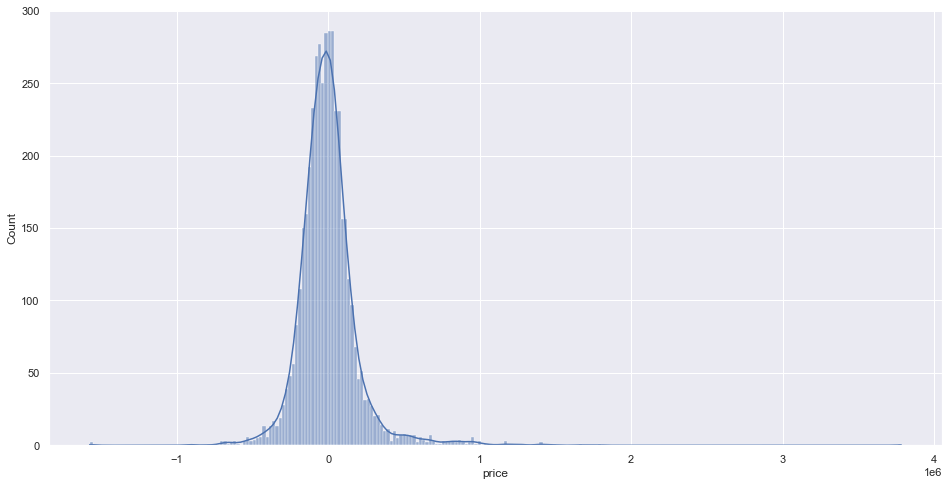

In [151]:
residuals = y_test - y_predict
plt.scatter(residuals,y_predict)
plt.show()

mean = df_predict["Residual"].mean()
std = df_predict["Residual"].std()

df_predict["StdResidual"] = (df_predict["Residual"] - mean)/std
df_predict

plt.scatter(df_predict["StdResidual"],df_predict["Residual"])
plt.show()

import pylab 

stats.probplot(y, dist="norm", plot=pylab)
plt.show()

sns.histplot(residuals, kde=True);


## Model 1 Cross-Validation

In [119]:
cross_validation_5 = KFold(5, shuffle=True)
cross_validation_10 = KFold(5, shuffle=True)
cross_validation_20 = KFold(5, shuffle=True)

cv_5_results  = np.mean(cross_val_score(model_1, X, y, cv=cross_validation_5,  scoring='r2'))
cv_10_results = np.mean(cross_val_score(model_1, X, y, cv=cross_validation_10, scoring='r2'))
cv_20_results = np.mean(cross_val_score(model_1, X, y, cv=cross_validation_20, scoring='r2'))

cv_5_results
cv_10_results
cv_20_results

0.677874935796465

0.6786427961241763

0.678100931316036

Our first iteration's r-squared has jumped to 0.672 with the addition of a number of features. At this point we could just continue to trial and error adding features, but fortunately we can make use of a shortcut that will calculate the optimum number of features to maximize r-squared using RFE. This works by determining the importance of each feature, with least important removed from the dataset.

# Using Feature Selection

In [120]:
# Include all features in X, and let response remain target.
X = df1.drop('price', axis=1)
y = df1['price']


#no of features
nof_list=np.arange(1,34)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print('Optimum number of features: %d' %nof)
print('Score with %d features: %f' % (nof, high_score))

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

Optimum number of features: 27
Score with 27 features: 0.727990


According to this process, our score tops out at 0.73 with 27 features.
Luckily, we can just as easily use sklearn to select those features for us.

In [121]:
y = df1['price']
X = df1.drop('price', axis=1)


model = LinearRegression() 
selector = RFE(model, n_features_to_select=(27)) 
 
# convert y to 1d np array to prevent DataConversionWarning
selector = selector.fit(X, y.values.ravel()) 
    
# create list of selected columns
selected_columns = X.columns[selector.support_ ]
selected_columns

Index(['bedrooms', 'bathrooms', 'floors', 'zipcode', 'lat', 'long',
       'recent_reno', 'age', 'waterfront_YES', 'view_EXCELLENT', 'view_FAIR',
       'view_GOOD', 'view_NONE', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very Good', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low',
       'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better'],
      dtype='object')

Now we will put these columns and values into a new object so we won't have to write out a long list of dropped
features when we define our regression variables.

In [122]:
selected_columns = df1[['price',
                        'bedrooms', 
                        'bathrooms', 
                        'floors', 
                        'zipcode', 
                        'lat',
                        'long',
                        'zipcode',
                        'recent_reno', 
                        'age', 
                        'waterfront_YES', 
                        'view_EXCELLENT', 
                        'view_FAIR', 
                        'view_GOOD',
                        'view_NONE', 
                        'condition_Fair', 
                        'condition_Good', 
                        'condition_Poor', 
                        'condition_Very Good', 
                        'grade_11 Excellent', 
                        'grade_12 Luxury',
                        'grade_13 Mansion', 
                        'grade_3 Poor', 
                        'grade_4 Low', 
                        'grade_5 Fair', 
                        'grade_6 Low Average', 
                        'grade_7 Average', 
                        'grade_8 Good', 
                        'grade_9 Better']]

We will store this master list of features in a new dataframe for convenience. This dataframe contains only features recommended by the RFE routine.

In [123]:
df_op = pd.DataFrame(selected_columns)
df_op

,price,bedrooms,bathrooms,floors,zipcode,lat,long,zipcode,recent_reno,age,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.00,3,1.00,1.00,98178,47.51,-122.26,98178,0,67,...,0,0,0,0,0,0,0,1,0,0
1,538000.00,3,2.25,2.00,98125,47.72,-122.32,98125,1,71,...,0,0,0,0,0,0,0,1,0,0
2,180000.00,2,1.00,1.00,98028,47.74,-122.23,98028,0,89,...,0,0,0,0,0,0,1,0,0,0
3,604000.00,4,3.00,1.00,98136,47.52,-122.39,98136,0,57,...,0,0,0,0,0,0,0,1,0,0
4,510000.00,3,2.00,1.00,98074,47.62,-122.05,98074,0,35,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00,3,2.50,3.00,98103,47.70,-122.35,98103,0,13,...,0,0,0,0,0,0,0,0,1,0
21593,400000.00,4,2.50,2.00,98146,47.51,-122.36,98146,0,8,...,0,0,0,0,0,0,0,0,1,0
21594,402101.00,2,0.75,2.00,98144,47.59,-122.30,98144,0,13,...,0,0,0,0,0,0,0,1,0,0
21595,400000.00,3,2.50,2.00,98027,47.53,-122.07,98027,0,18,...,0,0,0,0,0,0,0,0,1,0


## Checking Multicollinear Features

Next we will create a correlation matrix to look for multicollinear features

,price,bedrooms,bathrooms,floors,zipcode,lat,long,zipcode,recent_reno,age,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
price,1.00,0.32,0.53,0.26,-0.05,0.31,0.02,-0.05,0.12,-0.05,...,0.36,0.29,0.21,-0.01,-0.03,-0.08,-0.21,-0.32,0.00,0.24
bedrooms,0.32,1.00,0.53,0.18,-0.16,-0.01,0.14,-0.16,0.03,-0.16,...,0.12,0.06,0.04,-0.02,-0.07,-0.12,-0.24,-0.11,0.08,0.16
bathrooms,0.53,0.53,1.00,0.50,-0.20,0.02,0.22,-0.20,0.07,-0.51,...,0.25,0.16,0.10,-0.01,-0.06,-0.14,-0.37,-0.31,0.19,0.26
floors,0.26,0.18,0.50,1.00,-0.06,0.05,0.13,-0.06,0.01,-0.49,...,0.12,0.05,0.02,-0.01,-0.03,-0.08,-0.23,-0.31,0.20,0.24
zipcode,-0.05,-0.16,-0.20,-0.06,1.00,0.27,-0.56,1.00,0.05,0.35,...,-0.06,-0.04,0.00,-0.01,-0.01,0.01,0.15,0.07,-0.05,-0.09
lat,0.31,-0.01,0.02,0.05,0.27,1.00,-0.14,0.27,0.03,0.15,...,0.04,0.02,0.01,-0.02,-0.02,-0.05,-0.06,-0.04,0.03,0.04
long,0.02,0.14,0.22,0.13,-0.56,-0.14,1.00,-0.56,-0.06,-0.41,...,0.06,0.03,-0.01,0.01,0.01,0.01,-0.11,-0.11,0.03,0.13
zipcode,-0.05,-0.16,-0.20,-0.06,1.00,0.27,-0.56,1.00,0.05,0.35,...,-0.06,-0.04,0.00,-0.01,-0.01,0.01,0.15,0.07,-0.05,-0.09
recent_reno,0.12,0.03,0.07,0.01,0.05,0.03,-0.06,0.05,1.00,0.15,...,0.00,-0.00,0.01,-0.00,-0.01,-0.01,-0.02,-0.03,0.02,0.03
age,-0.05,-0.16,-0.51,-0.49,0.35,0.15,-0.41,0.35,0.15,1.00,...,-0.10,-0.05,-0.00,0.01,0.04,0.13,0.31,0.21,-0.20,-0.22


<AxesSubplot:>

<function matplotlib.pyplot.show(close=None, block=None)>

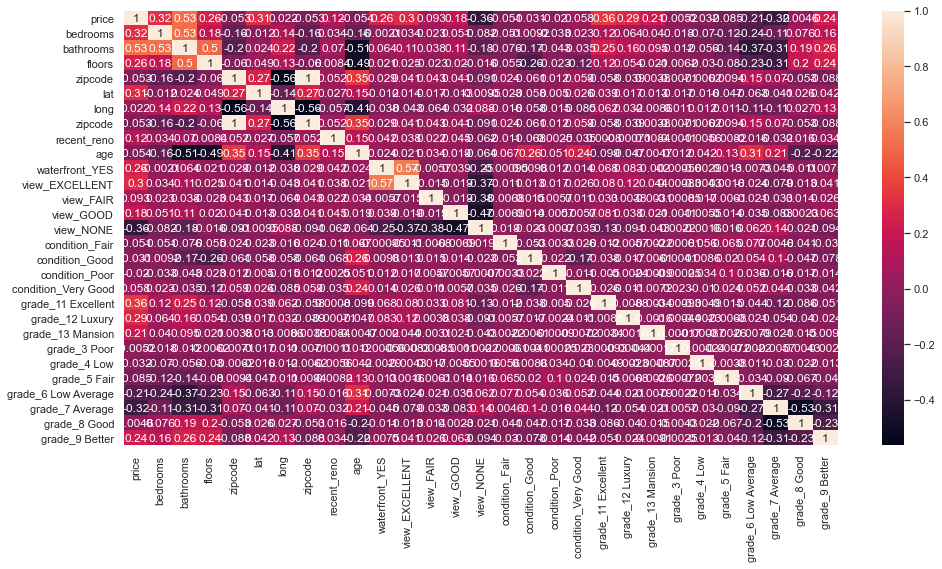

In [124]:
df_op.corr()
sns.set(rc={'figure.figsize':(16,8)})
sns.heatmap(df_op.corr(), annot=True)
plt.show

Doesn't look like we have much of a collinearity problem here.

Our next iteration will train and test on the RFE selected dataframe using all 27 features

# Model 2

In [153]:
y = df_op['price']
X = df_op.drop('price', axis=1)

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_2 = LinearRegression()
model_2.fit(X_train, y_train)

coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model_2.coef_})
coef_df

y_predict = model_2.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict, 'Residual': (y_test - y_predict)})
df_predict.astype(int)


print('The intercept is:', model_2.intercept_)
print('R-squared Score:', r2_score(y_test, y_predict))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

LinearRegression()

,Feature,Coefficient
0,bedrooms,14368.88
1,bathrooms,103776.86
2,floors,18557.80
3,zipcode,-308.34
4,lat,612909.70
5,long,-113947.54
6,zipcode,-308.34
7,recent_reno,90390.24
8,age,2623.23
9,waterfront_YES,556437.16


,Actual,Predicted,Residual
3686,132500,179557,-47057
10247,415000,388589,26410
4037,494000,296978,197021
3437,355000,433471,-78471
19291,606000,395560,210439
...,...,...,...
2522,175000,169285,5714
11119,394950,363408,31541
11973,437000,533836,-96836
17601,293000,274355,18644


The intercept is: 17997726.843487307
R-squared Score: 0.6798829946649407
Mean Absolute Error: 125399.00760742261
Mean Squared Error: 41939493139.11224
Root Mean Squared Error: 204791.3404885867


## Model 2 Predictions and Assumptions Tests

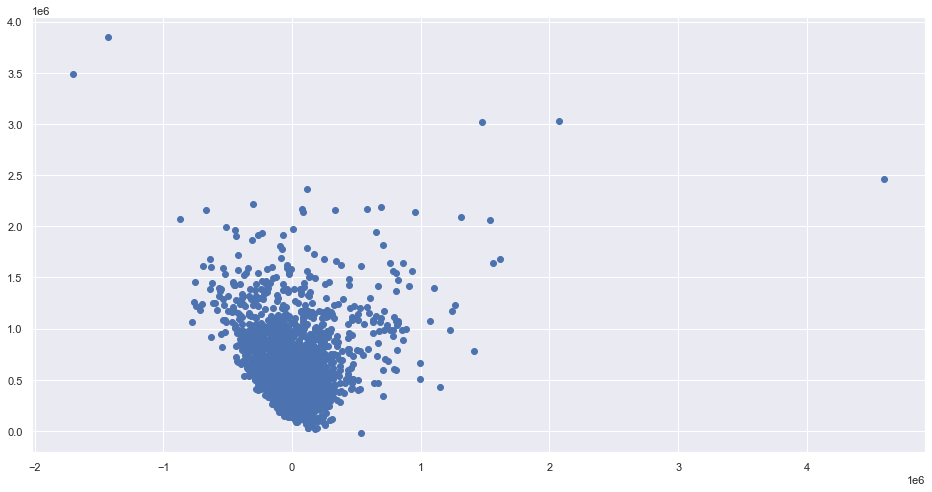

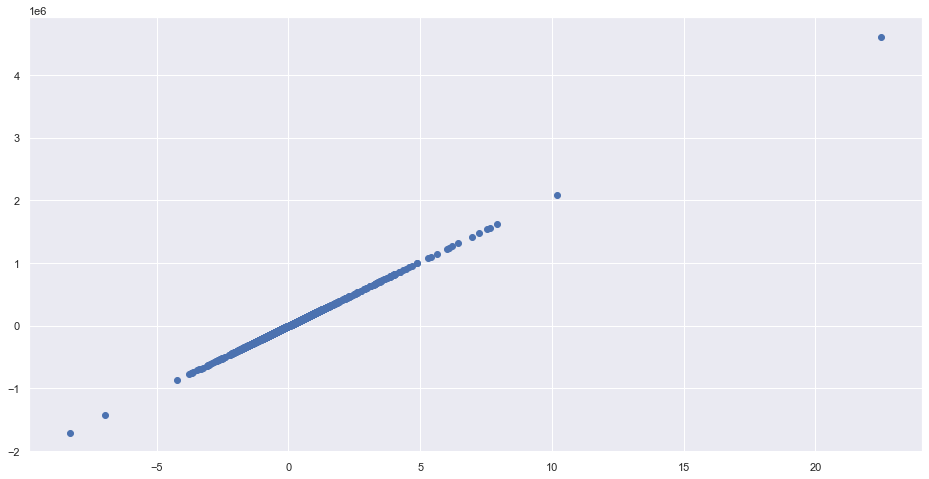

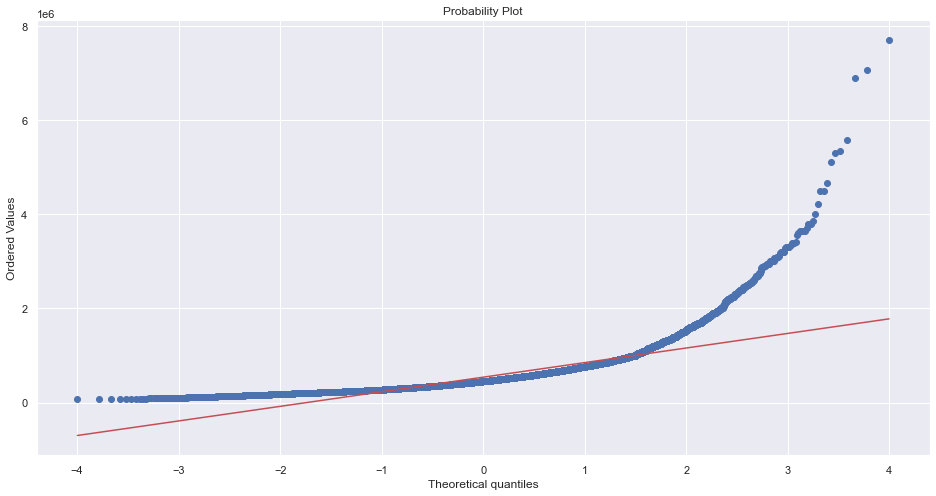

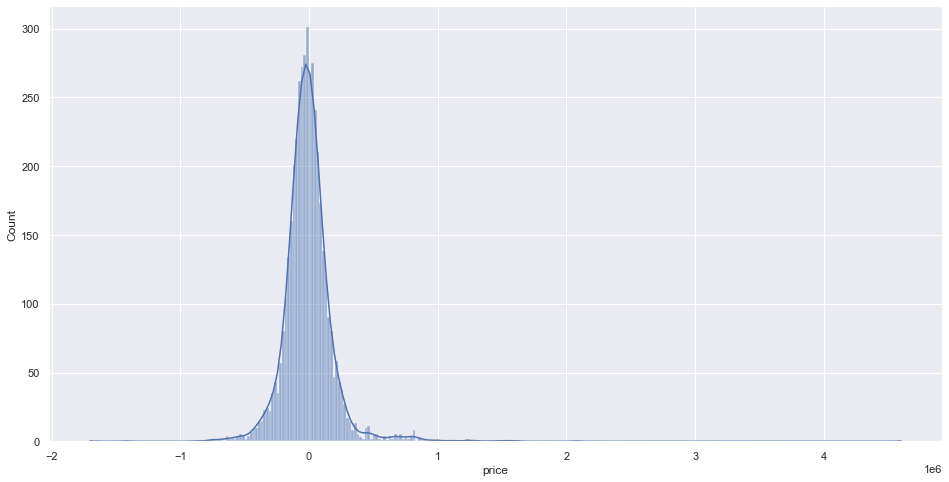

In [155]:
residuals = y_test - y_predict
plt.scatter(residuals,y_predict)
plt.show()

mean = df_predict["Residual"].mean()
std = df_predict["Residual"].std()

df_predict["StdResidual"] = (df_predict["Residual"] - mean)/std
df_predict

plt.scatter(df_predict["StdResidual"],df_predict["Residual"])
plt.show()

import pylab 

stats.probplot(y, dist="norm", plot=pylab)
plt.show()

sns.histplot(residuals, kde=True);


## Model 2 Cross-Validation

In [156]:
cross_validation_5 = KFold(5, shuffle=True)
cross_validation_10 = KFold(5, shuffle=True)
cross_validation_20 = KFold(5, shuffle=True)

cv_5_results  = np.mean(cross_val_score(model_2, X, y, cv=cross_validation_5,  scoring='r2'))
cv_10_results = np.mean(cross_val_score(model_2, X, y, cv=cross_validation_10, scoring='r2'))
cv_20_results = np.mean(cross_val_score(model_2, X, y, cv=cross_validation_20, scoring='r2'))

cv_5_results
cv_10_results
cv_20_results

0.6998483639663069

0.697111622403859

0.6966009093233512

Only a slight boost to r2. Hmm. Notably absent from the RFE selected columns are those that had some of the highest correlation to price. I want to go back to our original dataframe and drop only those features that suggested collinearity problems.
So we will ignore df_op for now and return to using df1.

# Model 3

In [157]:
y = df1['price']
X = df1.drop(['price',
              'sqft_lot15',             
              'long',
              'sqft_living15',
              'sqft_above'], axis=1)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_3 = LinearRegression()
model_3.fit(X_train, y_train)

coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model_3.coef_})
coef_df

y_predict = model_3.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict, 'Residual': (y_test - y_predict)})
#df_predict['Predicted'] = df_predict['Predicted'].astype(int)
df_predict.astype(int)

print('The intercept is:', model_3.intercept_)
print('R-squared Score:', r2_score(y_test, y_predict))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

LinearRegression()

,Feature,Coefficient
0,bedrooms,-20487.81
1,bathrooms,45269.20
2,sqft_living,133.09
3,sqft_lot,-0.17
4,floors,27668.24
5,zipcode,-396.45
6,lat,606196.19
7,recent_reno,95384.42
8,age,2463.92
9,waterfront_YES,538856.13


,Actual,Predicted,Residual
3686,132500,153165,-20665
10247,415000,428422,-13422
4037,494000,304294,189705
3437,355000,397052,-42052
19291,606000,415357,190642
...,...,...,...
2522,175000,169137,5862
11119,394950,376903,18046
11973,437000,460624,-23624
17601,293000,271908,21091


The intercept is: 10462773.275954584
R-squared Score: 0.7114046825924837
Mean Absolute Error: 119307.88402401214
Mean Squared Error: 37809741852.74521
Root Mean Squared Error: 194447.27268014126


## Model 3 Predictions and Assumptions Tests

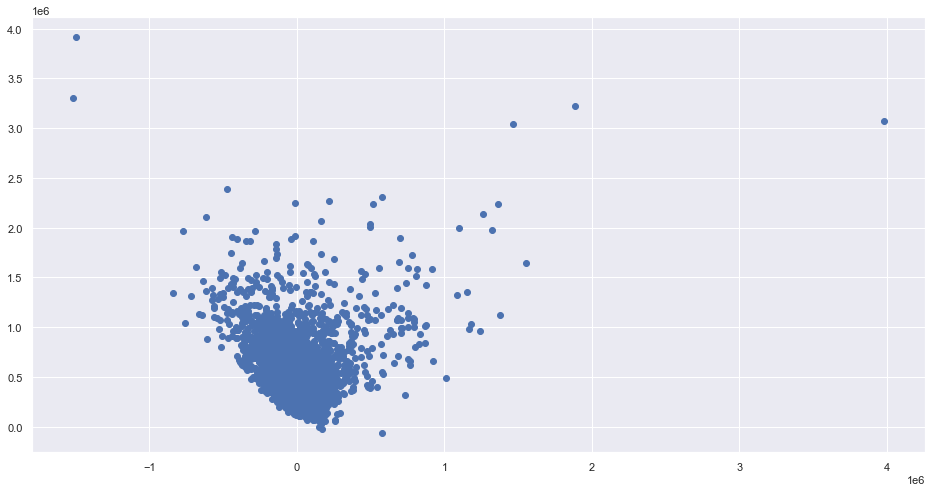

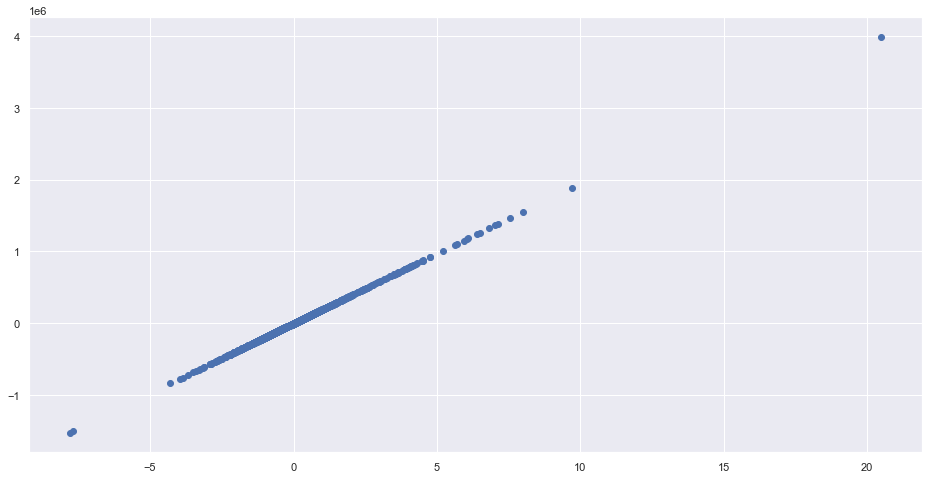

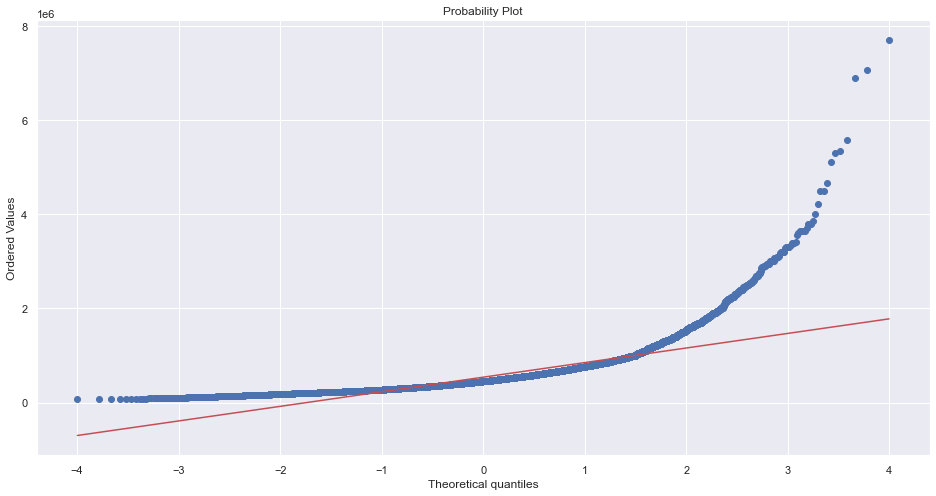

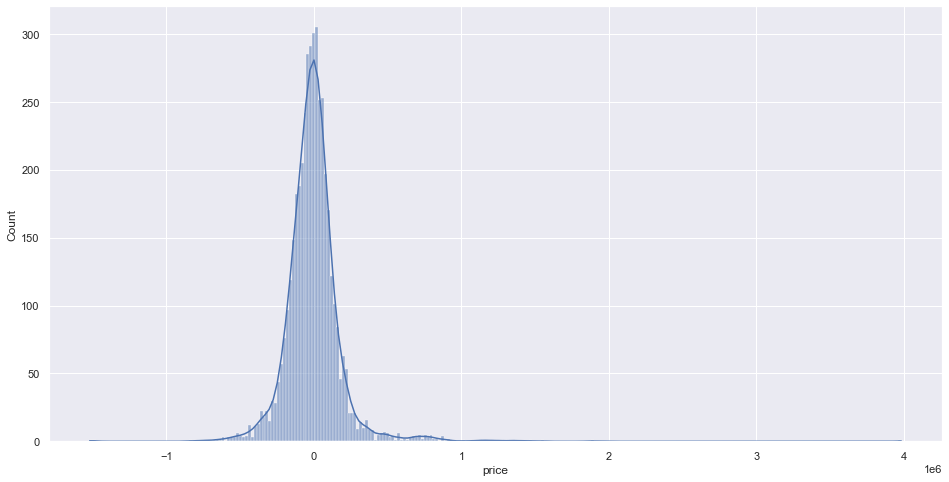

In [159]:
residuals = y_test - y_predict
plt.scatter(residuals,y_predict)
plt.show()

mean = df_predict["Residual"].mean()
std = df_predict["Residual"].std()

df_predict["StdResidual"] = (df_predict["Residual"] - mean)/std
df_predict

plt.scatter(df_predict["StdResidual"],df_predict["Residual"])
plt.show()

import pylab 

stats.probplot(y, dist="norm", plot=pylab)
plt.show()

sns.histplot(residuals, kde=True);


## Model 3 Cross-Validation

In [160]:
cross_validation_5 = KFold(5, shuffle=True)
cross_validation_10 = KFold(5, shuffle=True)
cross_validation_20 = KFold(5, shuffle=True)

cv_5_results  = np.mean(cross_val_score(model_3, X, y, cv=cross_validation_5,  scoring='r2'))
cv_10_results = np.mean(cross_val_score(model_3, X, y, cv=cross_validation_10, scoring='r2'))
cv_20_results = np.mean(cross_val_score(model_3, X, y, cv=cross_validation_20, scoring='r2'))

cv_5_results
cv_10_results
cv_20_results

0.7221764799096863

0.7234882610217487

0.721861468296289

As expected, we've maximized our r2 at about 0.73 using 27 features. Just as predicted by the RFE. It's interesting that even though that function's prediction ended up correct, it could not be acheived using the features selected by its own algorithm. 
What could account for that? My guess is that its trained to deprioritize features that display collinearity, even if model accuracy in the end takes a hit.

We've noticed that in our assumption test plots, most of the output indicates less than perfect adherence to the regression assumptions. Our final model will employ a log(x+1) transformation to normalize our very skewed original dataset. This should bring it more into line with the assumptions.

# Log(X+1) Transforming Data

In [161]:
df2 = np.log(abs(df1+1))
df2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,zipcode,lat,long,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,12.31,1.39,0.69,7.07,8.64,0.69,7.07,11.49,3.88,4.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00,0.00
1,13.20,1.39,1.18,7.85,8.89,1.10,7.68,11.49,3.89,4.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00,0.00
2,12.10,1.10,0.69,6.65,9.21,0.69,6.65,11.49,3.89,4.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00,0.00,0.00
3,13.31,1.61,1.39,7.58,8.52,0.69,6.96,11.49,3.88,4.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00,0.00
4,13.14,1.39,1.10,7.43,9.00,0.69,7.43,11.49,3.88,4.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,12.79,1.39,1.25,7.33,7.03,1.39,7.33,11.49,3.89,4.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00
21593,12.90,1.61,1.25,7.75,8.67,1.10,7.75,11.49,3.88,4.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00
21594,12.90,1.10,0.56,6.93,7.21,1.10,6.93,11.49,3.88,4.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00,0.00
21595,12.90,1.39,1.25,7.38,7.78,1.10,7.38,11.49,3.88,4.80,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.69,0.00


# Model 4

In [172]:
y = df2['price']
X = df2.drop('price', axis=1)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_4 = LinearRegression()
model_4.fit(X_train, y_train)

coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model_4.coef_})
coef_df

y_predict = model_4.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict, 'Residual': (y_test - y_predict)})
df_predict.astype(int)

print('The intercept is:', model_4.intercept_)
print('R-squared Score:', r2_score(y_test, y_predict))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

LinearRegression()

,Feature,Coefficient
0,bedrooms,-0.12
1,bathrooms,0.10
2,sqft_living,0.36
3,sqft_lot,0.02
4,floors,0.13
5,sqft_above,0.02
6,zipcode,-49.78
7,lat,68.82
8,long,20.30
9,sqft_living15,0.22


,Actual,Predicted,Residual
3686,11,12,0
10247,12,12,0
4037,13,12,0
3437,12,12,0
19291,13,12,0
...,...,...,...
2522,12,12,0
11119,12,12,0
11973,12,12,0
17601,12,12,0


The intercept is: 216.38408959796442
R-squared Score: 0.7528795551827167
Mean Absolute Error: 0.20220278044509044
Mean Squared Error: 0.06747809987112675
Root Mean Squared Error: 0.25976547089851404


## Model 4 Predictions and Assumptions Tests

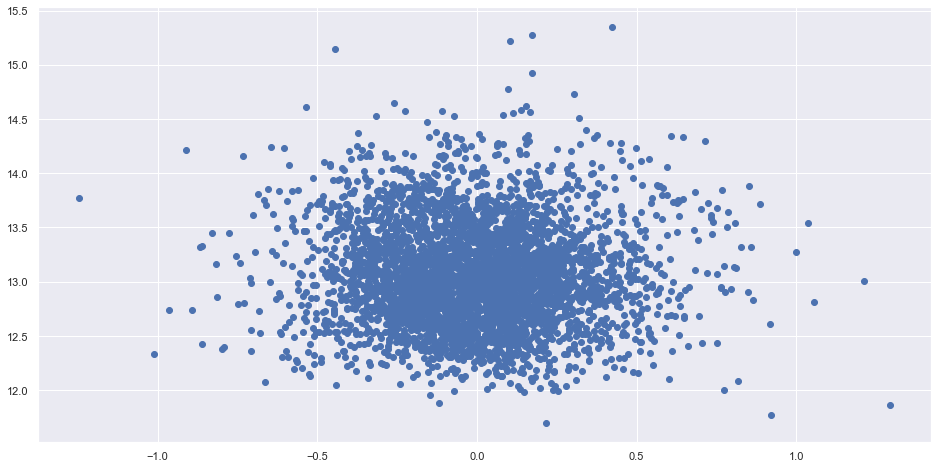

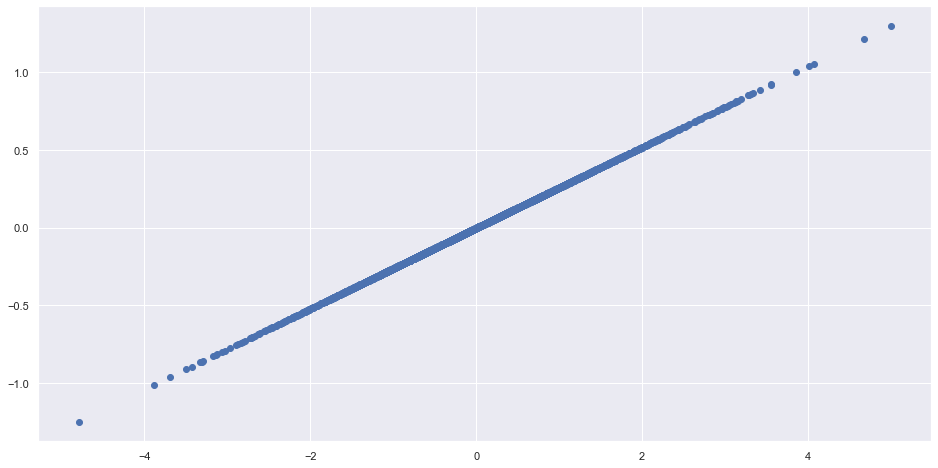

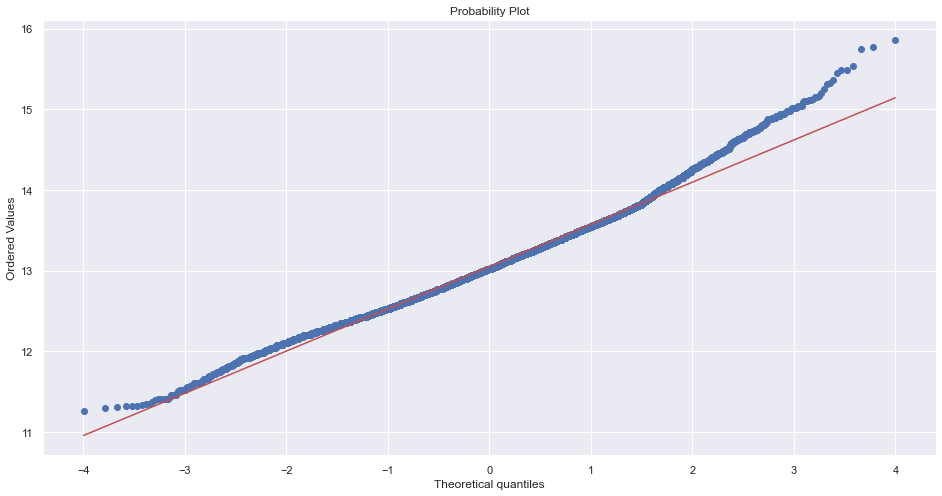

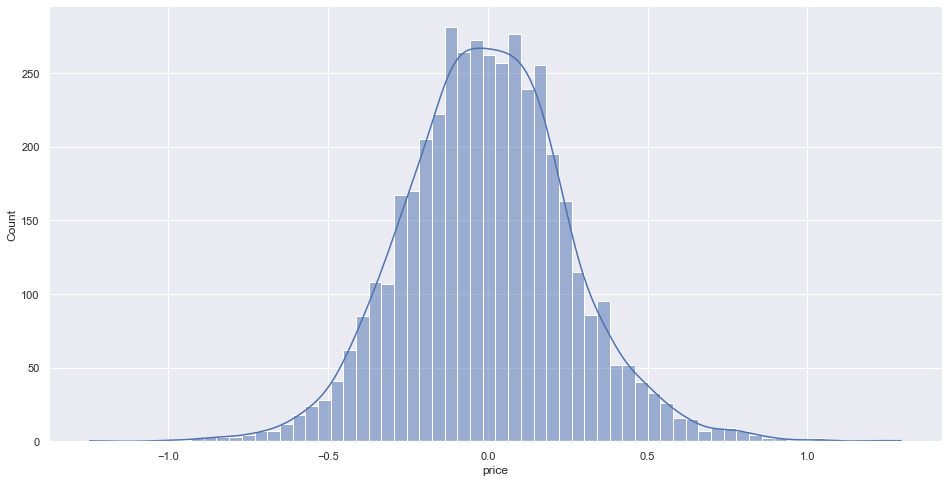

In [174]:
residuals = y_test - y_predict
plt.scatter(residuals,y_predict)
plt.show()

mean = df_predict["Residual"].mean()
std = df_predict["Residual"].std()

df_predict["StdResidual"] = (df_predict["Residual"] - mean)/std
df_predict

plt.scatter(df_predict["StdResidual"],df_predict["Residual"])
plt.show()

import pylab 

stats.probplot(y, dist="norm", plot=pylab)
plt.show()

sns.histplot(residuals, kde=True);


## Model 4 Cross-Validation

In [175]:
cross_validation_5 = KFold(5, shuffle=True)
cross_validation_10 = KFold(5, shuffle=True)
cross_validation_20 = KFold(5, shuffle=True)

cv_5_results  = np.mean(cross_val_score(model_4, X, y, cv=cross_validation_5,  scoring='r2'))
cv_10_results = np.mean(cross_val_score(model_4, X, y, cv=cross_validation_10, scoring='r2'))
cv_20_results = np.mean(cross_val_score(model_4, X, y, cv=cross_validation_20, scoring='r2'))

cv_5_results
cv_10_results
cv_20_results

0.7637005351820494

0.7633709520414602

0.7631707201509792

That is quite a difference! Particularly with respect to the test of heteroskedasticity and normality. It had little effect, however, on our scores.

Data transformation can be useful, but it can add complexity to interpretation. With that in mind, we will transform this last model back into its original form by reversing the log(x+1) operation.

# Model 5: Back-Transformation

In [166]:
X1 = np.exp(X)-1
y1 = np.exp(y)-1

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

model_5 = LinearRegression()
model_5.fit(X_train, y_train)

coef_df = pd.DataFrame({'Feature': X1.columns, 'Coefficient': model_5.coef_})
coef_df

y_predict = model_5.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict, 'Residual': (y_test - y_predict)})
df_predict.astype(int)

print('The intercept is:', model_5.intercept_)
print('R-squared Score:', r2_score(y_test, y_predict))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

LinearRegression()

,Feature,Coefficient
0,bedrooms,-21285.89
1,bathrooms,43257.61
2,sqft_living,128.10
3,sqft_lot,0.13
4,floors,27991.76
5,sqft_above,-0.54
6,zipcode,-585.13
7,lat,608573.02
8,long,198586.27
9,sqft_living15,34.44


,Actual,Predicted,Residual
3686,132499,148893,-16393
10247,415000,441334,-26334
4037,494000,221789,272210
3437,354999,405368,-50368
19291,605999,434456,171543
...,...,...,...
2522,175000,176939,-1939
11119,394950,384549,10400
11973,437000,484836,-47836
17601,293000,318803,-25803


The intercept is: 4919665.858943673
R-squared Score: 0.7138135232736573
Mean Absolute Error: 119829.41598994145
Mean Squared Error: 37494152379.091484
Root Mean Squared Error: 193634.0682294608


## Model 5 Back-Transformed Predictions and Assumptions Tests

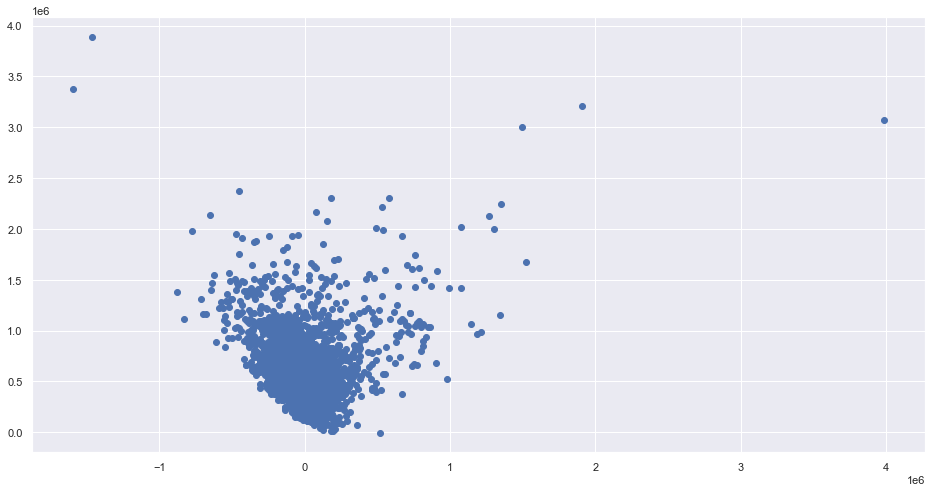

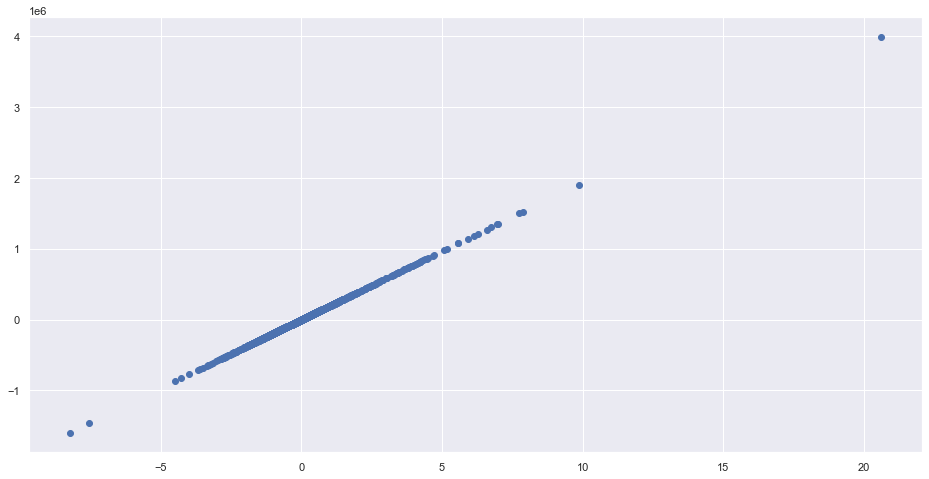

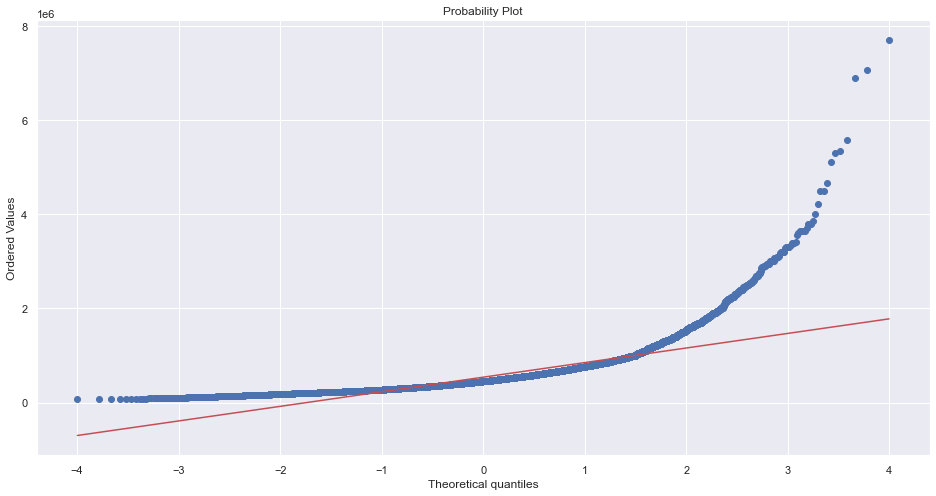

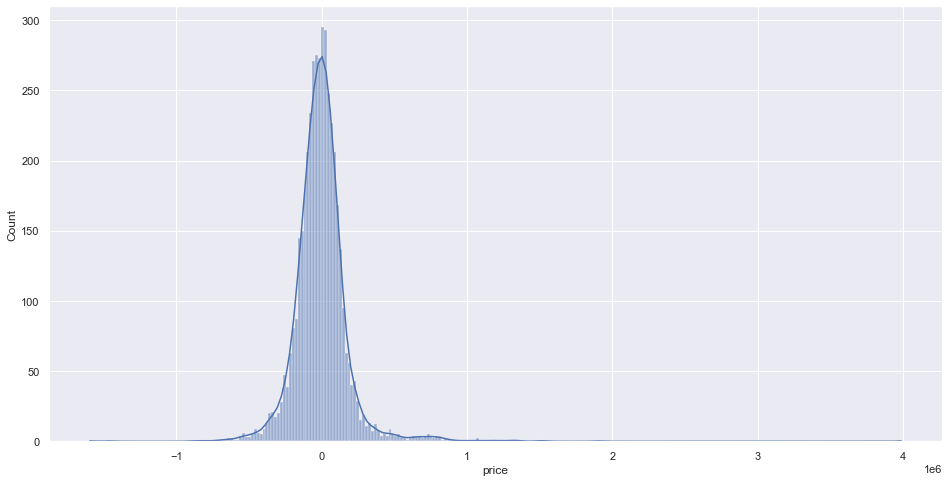

In [168]:
residuals = y_test - y_predict
plt.scatter(residuals,y_predict)
plt.show()

mean = df_predict["Residual"].mean()
std = df_predict["Residual"].std()

df_predict["StdResidual"] = (df_predict["Residual"] - mean)/std
df_predict

plt.scatter(df_predict["StdResidual"],df_predict["Residual"])
plt.show()

import pylab 

stats.probplot(y1, dist="norm", plot=pylab)
plt.show()

sns.histplot(residuals, kde=True);


## Model 5 Cross Validation

In [169]:
cross_validation_5 = KFold(5, shuffle=True)
cross_validation_10 = KFold(5, shuffle=True)
cross_validation_20 = KFold(5, shuffle=True)

cv_5_results  = np.mean(cross_val_score(model_5, X1, y1, cv=cross_validation_5,  scoring='r2'))
cv_10_results = np.mean(cross_val_score(model_5, X1, y1, cv=cross_validation_10, scoring='r2'))
cv_20_results = np.mean(cross_val_score(model_5, X1, y1, cv=cross_validation_20, scoring='r2'))

cv_5_results
cv_10_results
cv_20_results

0.7273817496440739

0.7285760507785086

0.7276305570303773

In the end, model_4 was the most accurate, and it will be the model we use to address our business problem.

# The Winning Model

In [176]:
y = df2['price']
X = df2.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_4 = LinearRegression()
model_4.fit(X_train, y_train)

y_predict = model_4.predict(X_test)
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict, 'Residual': (y_test - y_predict)})
df_predict.astype(int)

coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model_4.coef_})
coef_df

LinearRegression()

,Actual,Predicted,Residual
3686,11,12,0
10247,12,12,0
4037,13,12,0
3437,12,12,0
19291,13,12,0
...,...,...,...
2522,12,12,0
11119,12,12,0
11973,12,12,0
17601,12,12,0


,Feature,Coefficient
0,bedrooms,-0.12
1,bathrooms,0.10
2,sqft_living,0.36
3,sqft_lot,0.02
4,floors,0.13
5,sqft_above,0.02
6,zipcode,-49.78
7,lat,68.82
8,long,20.30
9,sqft_living15,0.22


In [177]:
cv_5_results
cv_10_results
cv_20_results

0.7637005351820494

0.7633709520414602

0.7631707201509792

# Analysis

As noted at the beginning of the modeling phase, the square footage of the property is a huge influence on the overall price. Our model indicates that for each unit increase in square footage, the sale price rises by at least $133.09. The bigger the house, the higher the price. So the answer to which feature exerts the greatest influence on price is sqft_living.

Conversely, for each bedroom, a property loses $20487.81! One might think that as the number of bedrooms increases, so too would square footage, and thus price, but our model indicates that that's just not the case.

As for which features, taken together, would be most convenient and powerful to provide the best rough estimates, those include sqft_living, bedrooms, bathrooms, waterfront_YES, and view.

Interestingly, the categorical coefficients (grade, condition, view, and waterfront) don't function quite the same. Since any given home can be part of only one category (that is, it can only have one grade, one condition, one view, and either have a waterfront or not), the coefficients there behave almost like constants. 

The geographical variables are also interesting. For regression purposes they're essentially meaningless. For instance, latitude's coefficient is 606196.19. But what does that mean? The coefficient is the same regardless of latitude. If price does not vary based on this data, should it be included? 

Users may not be able to provide an answer for potential questions like "what is the condition of your home?" or "what is your property's grade?". In the future, we may look at binning these categories to make them more broad and less sensitive to misidentification. 

Model_4's RMSE is 193634. This is the smallest among the models, so we will select this one for use.